<a href="https://colab.research.google.com/github/colafishx/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 2 – End-to-end Machine Learning project**

*This notebook contains all the sample code and solutions to the exercises in chapter 2.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [1]:
print("Welcome to Machine Learning!")

Welcome to Machine Learning!


This project requires Python 3.7 or above:

In [2]:
import sys

# assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [3]:
# from packaging import version
import sklearn

# assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Get the Data

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

## Download the Data

In [4]:
from pathlib import Path
import pandas as pd
# import tarfile
# import urllib.request

# def load_housing_data():
#     tarball_path = Path("datasets/housing.tgz")
#     if not tarball_path.is_file():
#         Path("datasets").mkdir(parents=True, exist_ok=True)
#         url = "https://github.com/ageron/data/raw/main/housing.tgz"
#         urllib.request.urlretrieve(url, tarball_path)
#         with tarfile.open(tarball_path) as housing_tarball:
#             housing_tarball.extractall(path="datasets")
#     return pd.read_csv(Path("datasets/housing/housing.csv"))

# housing = load_housing_data()

In [5]:
# from google.colab import files
# files.upload()

# from os import environ
# fname = 'house-prices-advanced-regression-techniques'
# environ['fname'] = fname

# !rm -r kaggle
# !mkdir kaggle
# !mv kaggle.json kaggle/
# !chmod 600 kaggle/kaggle.json

# !kaggle competitions download -c "$fname" 

# !mkdir Dataset
# !cp "$fname".zip /content/Dataset/"$fname".zip
# !unzip -q /content/Dataset/"$fname".zip -d /content/Dataset
# !rm /content/Dataset/"$fname".zip

# housing = pd.read_csv(Path('Dataset/train.csv')).drop('Id', axis=1)

In [6]:
from google.colab import files
from os import environ
fname = 'house-prices-advanced-regression-techniques'
environ['fname'] = fname

!pip install kaggle

uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c "$fname"
!unzip "$fname".zip
housing = pd.read_csv(Path('train.csv')).drop('Id', axis=1)
housing.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 77.4MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# !pip install pandas-profiling
# from pandas_profiling import ProfileReport

# report = ProfileReport(housing, title=fname, explorative=True)
# report.to_file(fname+".html")

## Take a Quick Look at the Data Structure

In [8]:
# housing.head()

In [9]:
# housing.info()

In [10]:
# for i in housing.select_dtypes(include='object').columns:
#   print(i,housing[i].value_counts(),sep = '/n')

In [11]:
# housing.describe()

In [12]:
# housing.corr()

<ipython-input-13-2c9beebb7f14>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(housing.corr(), fignum=f.number)


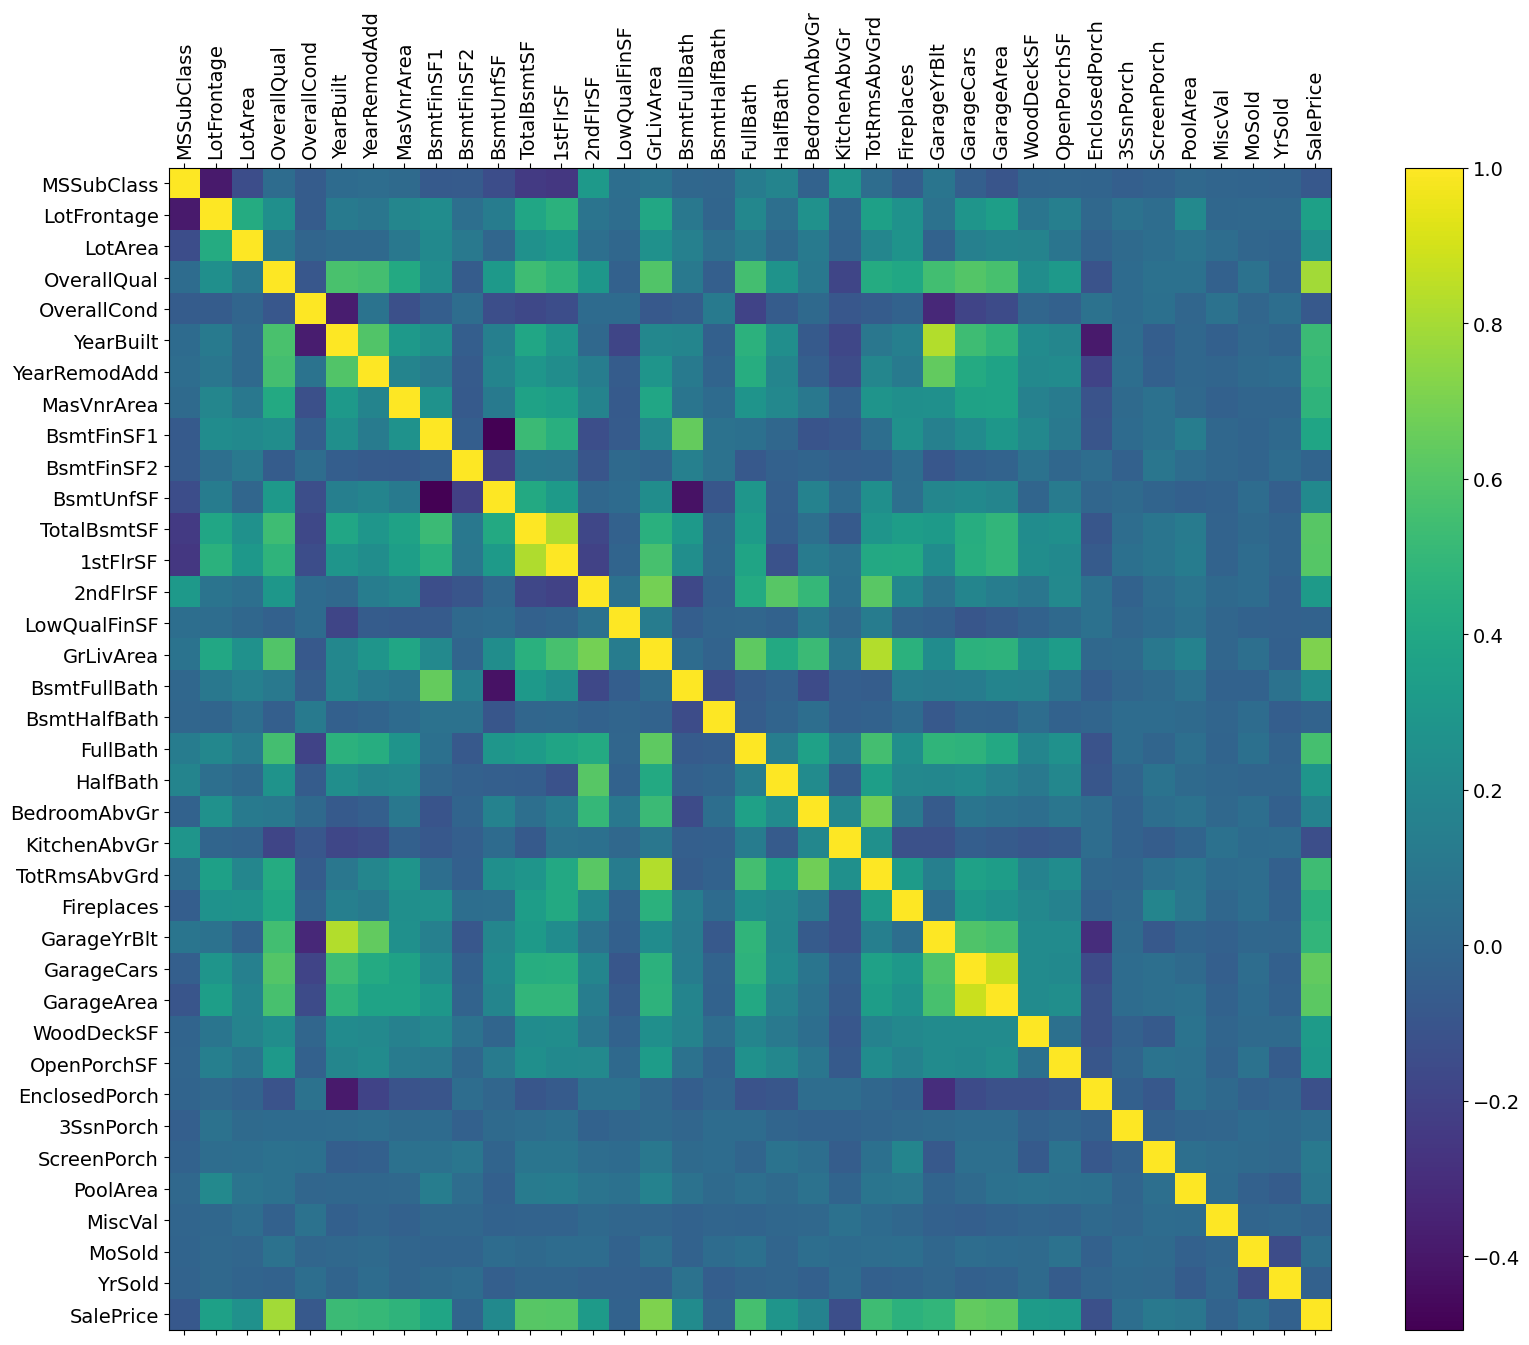

In [13]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(15,15))
# plt.matshow(housing.corr(),fignum=1)
# ax.set_xticklabels(['']+housing.columns.values.tolist())
# ax.set_yticklabels(['']+housing.columns.values.tolist())
# plt.show()

f = plt.figure(figsize=(19, 15))
plt.matshow(housing.corr(), fignum=f.number)
plt.xticks(range(housing.select_dtypes(['number']).shape[1]), housing.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(housing.select_dtypes(['number']).shape[1]), housing.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16)

In [14]:
housing.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

The following cell is not shown either in the book. It creates the `images/end_to_end_project` folder (if it doesn't already exist), and it defines the `save_fig()` function which is used through this notebook to save the figures in high-res for the book.

In [15]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

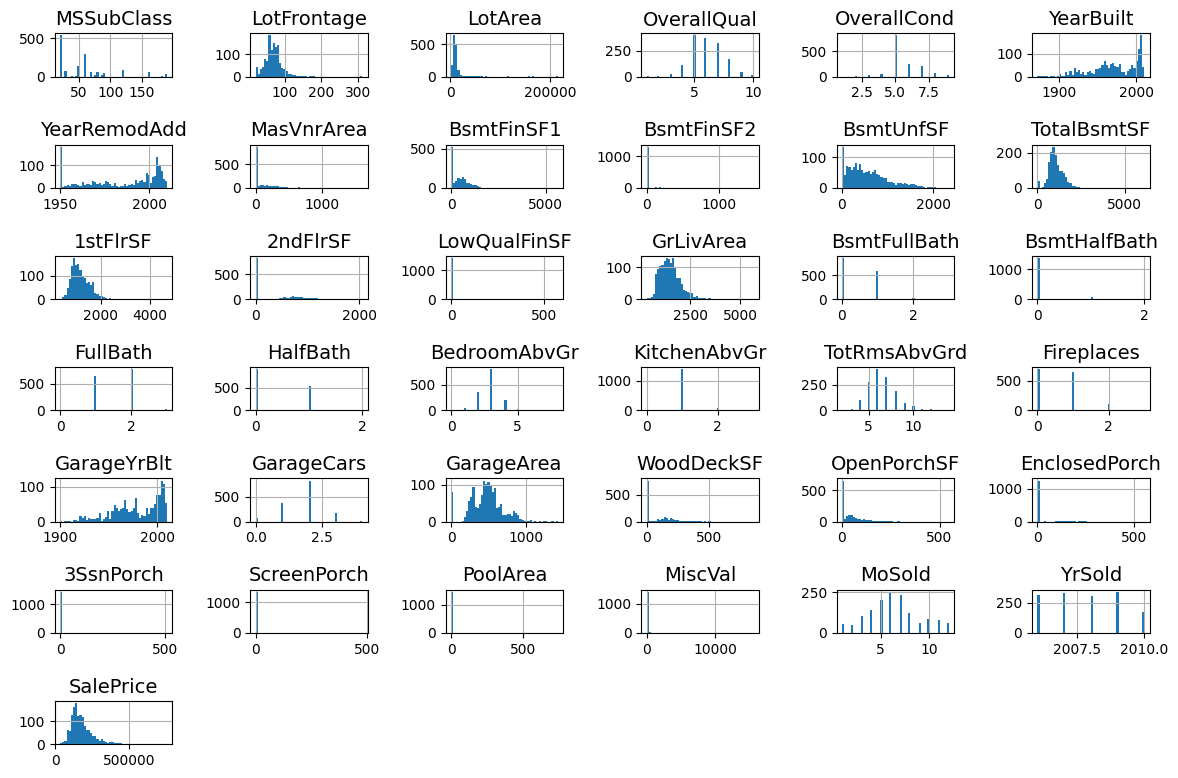

In [16]:
# import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Create a Test Set

In [17]:
import numpy as np

# def shuffle_and_split_data(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
# train_set, test_set = shuffle_and_split_data(housing, 0.2)
# len(train_set)

In [19]:
# len(test_set)

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [20]:
# np.random.seed(42)

Sadly, this won't guarantee that this notebook will output exactly the same results as in the book, since there are other possible sources of variation. The most important is the fact that algorithms get tweaked over time when libraries evolve. So please tolerate some minor differences: hopefully, most of the outputs should be the same, or at least in the right ballpark.

Note: another source of randomness is the order of Python sets: it is based on Python's `hash()` function, which is randomly "salted" when Python starts up (this started in Python 3.3, to prevent some denial-of-service attacks). To remove this randomness, the solution is to set the `PYTHONHASHSEED` environment variable to `"0"` _before_ Python even starts up. Nothing will happen if you do it after that. Luckily, if you're running this notebook on Colab, the variable is already set for you.

In [21]:
# from zlib import crc32

# def is_id_in_test_set(identifier, test_ratio):
#     return crc32(np.int64(identifier)) < test_ratio * 2**32

# def split_data_with_id_hash(data, test_ratio, id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]

In [22]:
# housing_with_id = housing.reset_index()  # adds an `index` column
# train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [23]:
# housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
# train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [25]:
test_set["Alley"].isnull().sum()

275

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution). The `cdf()` method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [26]:
# extra code – shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929913


If you prefer simulations over maths, here's how you could get roughly the same result:

In [27]:
# extra code – shows another way to estimate the probability of bad sample

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

In [28]:
# housing["income_cat"] = pd.cut(housing["median_income"],
#                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
#                                labels=[1, 2, 3, 4, 5])

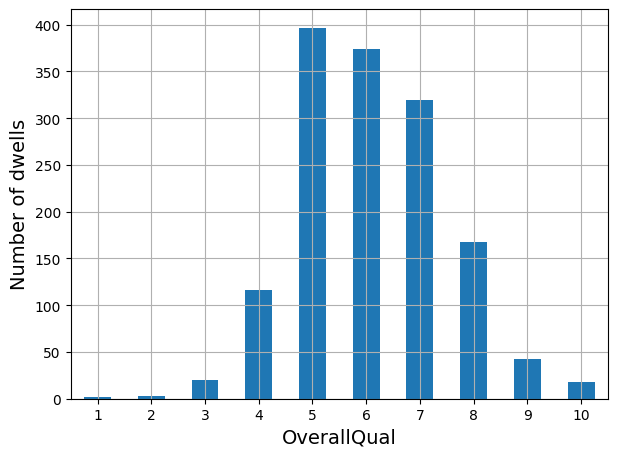

In [29]:
housing["OverallQual"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("OverallQual")
plt.ylabel("Number of dwells")
save_fig("housing_OverallCond_bar_plot")  # extra code
plt.show()

In [30]:
# from sklearn.model_selection import StratifiedShuffleSplit

# splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# strat_splits = []
# for train_index, test_index in splitter.split(housing, housing["income_cat"]):
#     strat_train_set_n = housing.iloc[train_index]
#     strat_test_set_n = housing.iloc[test_index]
#     strat_splits.append([strat_train_set_n, strat_test_set_n])

In [31]:
# strat_train_set, strat_test_set = strat_splits[0]

It's much shorter to get a single stratified split:

In [32]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["OverallQual"], random_state=42)

In [33]:
strat_test_set["OverallQual"].value_counts() / len(strat_test_set)

5     0.270548
6     0.256849
7     0.219178
8     0.113014
4     0.078767
9     0.030822
3     0.013699
10    0.013699
2     0.003425
Name: OverallQual, dtype: float64

In [34]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["OverallQual"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "OverallQual"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
OverallQual,,,,,
1,0.14,NaN,NaN,NaN,NaN
2,0.21,0.34,0.68,66.67,233.33
3,1.37,1.37,1.37,0.00,0.00
4,7.95,7.88,9.59,-0.86,20.69
5,27.19,27.05,30.48,-0.50,12.09
6,25.62,25.68,21.58,0.27,-15.78
7,21.85,21.92,20.89,0.31,-4.39
8,11.51,11.30,11.30,-1.79,-1.79
9,2.95,3.08,2.40,4.65,-18.60


In [35]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("OverallQual", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [36]:
housing = strat_train_set.copy()

## Looking for Correlations

In [37]:
corr_matrix = housing.corr()

<ipython-input-37-bac487469033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [38]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.700908
GarageCars       0.651388
GarageArea       0.634647
TotalBsmtSF      0.604969
1stFlrSF         0.596394
FullBath         0.563145
TotRmsAbvGrd     0.534714
YearBuilt        0.528381
YearRemodAdd     0.526142
GarageYrBlt      0.493869
Fireplaces       0.462406
MasVnrArea       0.461716
LotFrontage      0.353105
BsmtFinSF1       0.351111
OpenPorchSF      0.325071
WoodDeckSF       0.312707
2ndFlrSF         0.307961
HalfBath         0.290130
LotArea          0.275339
BsmtUnfSF        0.242704
BsmtFullBath     0.231159
BedroomAbvGr     0.175717
ScreenPorch      0.127168
MoSold           0.083639
3SsnPorch        0.056172
PoolArea         0.015600
BsmtFinSF2      -0.003980
YrSold          -0.005636
MiscVal         -0.024854
LowQualFinSF    -0.030394
BsmtHalfBath    -0.040339
OverallCond     -0.081920
MSSubClass      -0.087740
EnclosedPorch   -0.130961
KitchenAbvGr    -0.137589
Name: SalePrice, dtype: float64

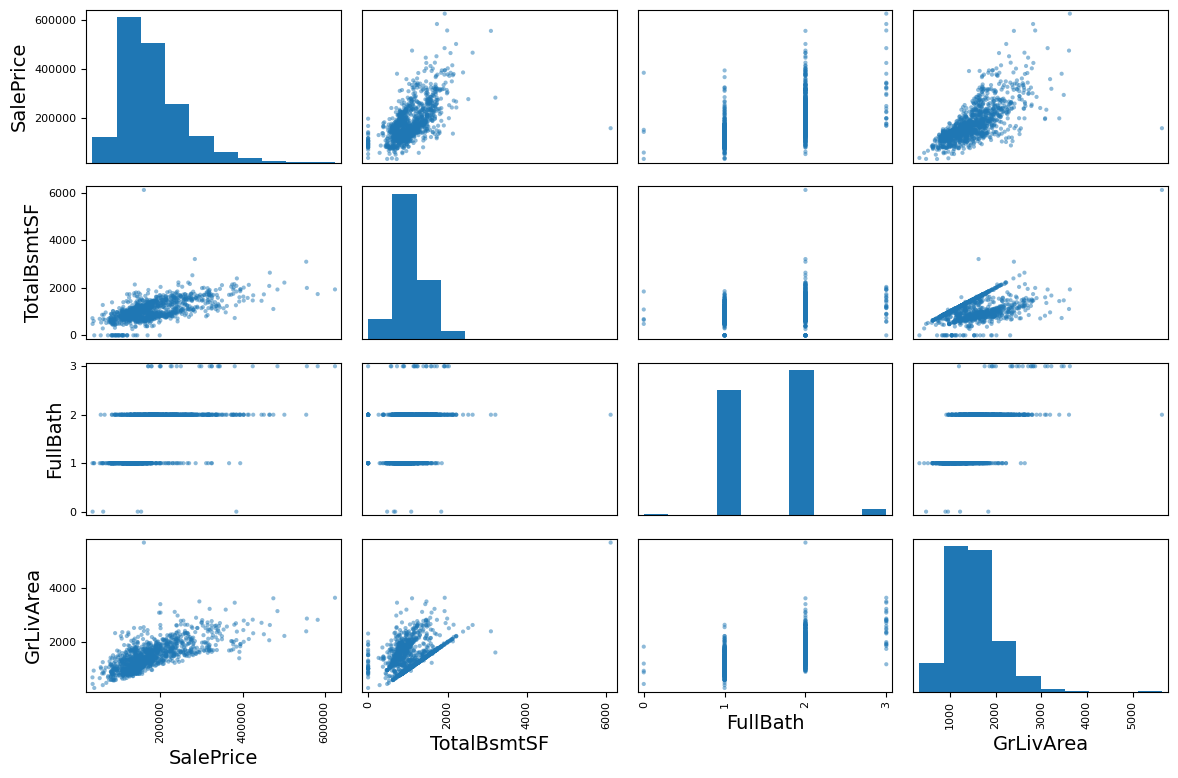

In [39]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice","TotalBsmtSF", "FullBath","GrLivArea"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

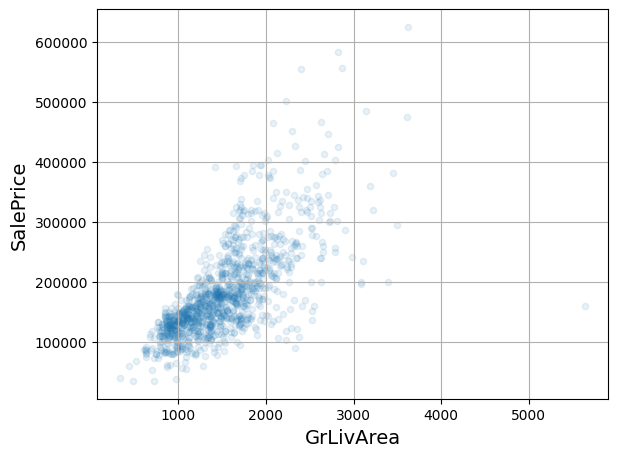

In [40]:
housing.plot(kind="scatter", x="GrLivArea", y="SalePrice",
             alpha=0.1, grid=True)
save_fig("Quad_vs_house_price_scatterplot")  # extra code
plt.show()

## Experimenting with Attribute Combinations

In [41]:
housing["flFeet_per_room"] = (housing["1stFlrSF"] + housing["2ndFlrSF"]) / housing["TotRmsAbvGrd"]
housing["bedrooms_ratio"] = housing["BedroomAbvGr"] / housing["TotRmsAbvGrd"]
housing["grFeet_per_car"] = housing["GarageArea"] / housing["GarageCars"]

In [42]:
corr_matrix = housing.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

<ipython-input-42-a3e4bc203268>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


SalePrice          1.000000
GrLivArea          0.700908
GarageCars         0.651388
GarageArea         0.634647
TotalBsmtSF        0.604969
1stFlrSF           0.596394
FullBath           0.563145
flFeet_per_room    0.542769
TotRmsAbvGrd       0.534714
YearBuilt          0.528381
YearRemodAdd       0.526142
GarageYrBlt        0.493869
Fireplaces         0.462406
MasVnrArea         0.461716
LotFrontage        0.353105
BsmtFinSF1         0.351111
OpenPorchSF        0.325071
WoodDeckSF         0.312707
2ndFlrSF           0.307961
HalfBath           0.290130
LotArea            0.275339
BsmtUnfSF          0.242704
BsmtFullBath       0.231159
BedroomAbvGr       0.175717
ScreenPorch        0.127168
MoSold             0.083639
3SsnPorch          0.056172
PoolArea           0.015600
BsmtFinSF2        -0.003980
YrSold            -0.005636
MiscVal           -0.024854
grFeet_per_car    -0.025609
LowQualFinSF      -0.030394
BsmtHalfBath      -0.040339
OverallCond       -0.081920
MSSubClass        -0

# Prepare the Data for Machine Learning Algorithms

Let's revert to the original training set and separate the target (note that `strat_train_set.drop()` creates a copy of `strat_train_set` without the column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`):

In [43]:
housing = strat_train_set.drop("SalePrice", axis=1)
housing_labels = strat_train_set["SalePrice"].copy()

## Data Cleaning

In the book 3 options are listed to handle the NaN values:

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

For each option, we'll create a copy of `housing` and work on that copy to avoid breaking `housing`. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [44]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
825,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2008,New,Partial
948,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal
188,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca
1059,50,RL,NaN,11275,Pave,NaN,IR1,HLS,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
667,20,RL,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,120,RL,61.0,7658,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
180,160,FV,NaN,2117,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
1090,90,RL,60.0,8544,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1368,120,RM,NaN,4435,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [45]:
col_miss = housing.columns[housing.isnull().any()].values
col_miss

array(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'], dtype=object)

In [46]:
housing_option1 = housing.copy()

# housing_option1.dropna(inplace=True) 
housing_option1.dropna(subset=col_miss, inplace=True)  # option 1

# housing_option1.loc[null_rows_idx].head()
housing_option1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [47]:
housing_option2 = housing.copy()

housing_option2.drop(columns=col_miss,inplace=True)  # option 2

housing_option2.loc[null_rows_idx].head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
825,20,RL,14803,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,45,0,0,0,0,0,6,2008,New,Partial
948,60,RL,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,96,0,0,0,0,0,2,2006,WD,Normal
188,90,RL,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,...,0,0,0,0,0,0,6,2009,WD,Alloca
1059,50,RL,11275,Pave,IR1,HLS,AllPub,Corner,Mod,Crawfor,...,0,19,0,0,0,0,3,2007,WD,Normal
667,20,RL,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,...,42,0,0,0,0,0,10,2008,WD,Normal


In [48]:
col_miss_g50 = housing.columns[housing.isnull().sum() / len(housing) > .5].values
col_miss_l50 = housing.columns[(housing.isnull().sum() / len(housing) <= .5) & (housing.isnull().sum() / len(housing) > 0)].values
print(len(col_miss_g50) ,col_miss_g50 ,len(col_miss_l50), col_miss_l50, sep='\n')

4
['Alley' 'PoolQC' 'Fence' 'MiscFeature']
15
['LotFrontage' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'FireplaceQu'
 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond']


In [49]:
housing['Fence'].dtypes == 'O'

True

In [50]:
housing_option3 = housing.copy()

housing_option3.drop(columns=col_miss_g50,inplace=True)
for i in col_miss_l50:
  if housing[i].dtypes != 'O':
    median = housing[i].median()
    housing_option3[i].fillna(median, inplace=True)  # option 3
  else:
    mode = housing[i].mode()
    housing_option3[i].fillna(mode, inplace=True)

housing_option3.loc[null_rows_idx].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
825,20,RL,114.0,14803,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,45,0,0,0,0,0,6,2008,New,Partial
948,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,96,0,0,0,0,0,2,2006,WD,Normal
188,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2009,WD,Alloca
1059,50,RL,70.0,11275,Pave,IR1,HLS,AllPub,Corner,Mod,...,0,19,0,0,0,0,3,2007,WD,Normal
667,20,RL,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,10,2008,WD,Normal


In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Separating out the numerical attributes to use the `"median"` strategy (as it cannot be calculated on text attributes like `ocean_proximity`):

In [52]:
housing_num = housing.select_dtypes(include=[np.number])

In [53]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [54]:
imputer.statistics_

array([5.0000e+01, 7.0000e+01, 9.5040e+03, 5.0000e+00, 1.9720e+03,
       1.9930e+03, 0.0000e+00, 3.8200e+02, 0.0000e+00, 4.6000e+02,
       9.7700e+02, 1.0855e+03, 0.0000e+00, 0.0000e+00, 1.4585e+03,
       0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00,
       1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9790e+03, 2.0000e+00,
       4.7600e+02, 0.0000e+00, 2.4000e+01, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 2.0080e+03])

Check that this is the same as manually computing the median of each attribute:

In [55]:
housing_num.median().values

array([5.0000e+01, 7.0000e+01, 9.5040e+03, 5.0000e+00, 1.9720e+03,
       1.9930e+03, 0.0000e+00, 3.8200e+02, 0.0000e+00, 4.6000e+02,
       9.7700e+02, 1.0855e+03, 0.0000e+00, 0.0000e+00, 1.4585e+03,
       0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00,
       1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9790e+03, 2.0000e+00,
       4.7600e+02, 0.0000e+00, 2.4000e+01, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 2.0080e+03])

Transform the training set:

In [56]:
X = imputer.transform(housing_num)

In [57]:
imputer.feature_names_in_

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype=object)

In [58]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [59]:
housing_tr.loc[null_rows_idx].head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
825,20.0,114.0,14803.0,5.0,2007.0,2008.0,816.0,1636.0,0.0,442.0,...,1220.0,188.0,45.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
948,60.0,65.0,14006.0,5.0,2002.0,2002.0,144.0,0.0,0.0,936.0,...,474.0,144.0,96.0,0.0,0.0,0.0,0.0,0.0,2.0,2006.0
188,90.0,64.0,7018.0,5.0,1979.0,1979.0,275.0,1086.0,0.0,0.0,...,528.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0
1059,50.0,70.0,11275.0,7.0,1932.0,1950.0,480.0,297.0,557.0,0.0,...,432.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,3.0,2007.0
667,20.0,65.0,8125.0,5.0,1994.0,1998.0,258.0,1138.0,0.0,270.0,...,575.0,224.0,42.0,0.0,0.0,0.0,0.0,0.0,10.0,2008.0


In [60]:
imputer.strategy

'median'

In [61]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [62]:
housing_tr.loc[null_rows_idx].head()  # not shown in the book

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
825,20.0,114.0,14803.0,5.0,2007.0,2008.0,816.0,1636.0,0.0,442.0,...,1220.0,188.0,45.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
948,60.0,65.0,14006.0,5.0,2002.0,2002.0,144.0,0.0,0.0,936.0,...,474.0,144.0,96.0,0.0,0.0,0.0,0.0,0.0,2.0,2006.0
188,90.0,64.0,7018.0,5.0,1979.0,1979.0,275.0,1086.0,0.0,0.0,...,528.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0
1059,50.0,70.0,11275.0,7.0,1932.0,1950.0,480.0,297.0,557.0,0.0,...,432.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,3.0,2007.0
667,20.0,65.0,8125.0,5.0,1994.0,1998.0,258.0,1138.0,0.0,270.0,...,575.0,224.0,42.0,0.0,0.0,0.0,0.0,0.0,10.0,2008.0


In [63]:
#from sklearn import set_config
#
# set_config(transform_output="pandas")  # scikit-learn >= 1.2

Now let's drop some outliers:

In [64]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [65]:
outlier_pred

array([ 1,  1,  1, ...,  1,  1, -1])

If you wanted to drop outliers, you would run the following code:

In [66]:
#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [67]:
housing_cat = housing.select_dtypes(include='object')
housing_cat.head(8)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
825,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial
948,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
188,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Alloca
1059,RL,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,...,Detchd,Unf,TA,Fa,Y,NaN,NaN,NaN,WD,Normal
667,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
968,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,GdWo,NaN,WD,Abnorml
1194,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
331,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [68]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [69]:
housing_cat_encoded[:8]

array([[ 3.,  1., nan,  3.,  3.,  0.,  4.,  0., 16.,  4.,  4.,  0.,  2.,
         3.,  1.,  5.,  5.,  1.,  0.,  4.,  2.,  0.,  3.,  0.,  2.,  5.,
         1.,  0.,  1.,  4.,  0.,  5.,  2.,  1.,  0.,  4.,  4.,  2., nan,
        nan, nan,  6.,  5.],
       [ 3.,  1., nan,  0.,  3.,  0.,  4.,  0.,  5.,  2.,  2.,  0.,  5.,
         1.,  1., 12., 13.,  1.,  2.,  4.,  2.,  2.,  3., nan,  5.,  5.,
         1.,  0.,  1.,  4.,  2.,  5.,  4.,  1.,  1.,  4.,  4.,  2., nan,
        nan, nan,  8.,  4.],
       [ 3.,  1., nan,  3.,  0.,  0.,  4.,  0., 20.,  1.,  2.,  2.,  6.,
         1.,  1.,  9., 10.,  3.,  3.,  4.,  1.,  2.,  3.,  0.,  2.,  5.,
         1.,  4.,  1.,  4.,  3.,  5.,  4.,  5.,  2.,  4.,  4.,  2., nan,
        nan, nan,  8.,  2.],
       [ 3.,  1., nan,  0.,  1.,  0.,  0.,  1.,  6.,  2.,  2.,  0.,  0.,
         1.,  1.,  8.,  8.,  1.,  3.,  4.,  1.,  3.,  3.,  2.,  4.,  3.,
         1.,  4.,  1.,  4.,  3.,  5.,  2.,  5.,  2.,  4.,  1.,  2., nan,
        nan, nan,  8.,  4.],
       [

In [70]:
ordinal_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Grvl', 'Pave', nan], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 arr

In [71]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [72]:
housing_cat_1hot

<1168x264 sparse matrix of type '<class 'numpy.float64'>'
	with 50224 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [73]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [74]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [75]:
cat_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Grvl', 'Pave', nan], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 arr

In [76]:
housing_test = pd.DataFrame({"PavedDrive": ['N', 'P', 'Y']})
pd.get_dummies(housing_test)

,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1,0,0
1,0,1,0
2,0,0,1


In [77]:
# cat_encoder.transform(housing_test)

In [78]:
# df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
# pd.get_dummies(df_test_unknown)

In [79]:
# cat_encoder.handle_unknown = "ignore"
# cat_encoder.transform(df_test_unknown)

In [80]:
cat_encoder.feature_names_in_

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [81]:
cat_encoder.get_feature_names_out()

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl',
       'Alley_Pave', 'Alley_nan', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', '

In [82]:
# df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
#                          columns=cat_encoder.get_feature_names_out(),
#                          index=df_test_unknown.index)

In [83]:
# df_output

## Feature Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [85]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

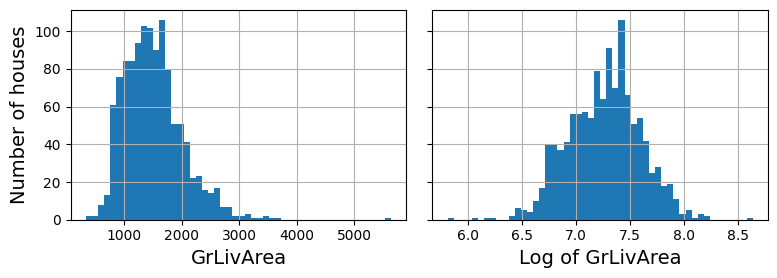

In [86]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["GrLivArea"].hist(ax=axs[0], bins= 50)
housing["GrLivArea"].apply(np.log).hist(ax=axs[1], bins= 50)
axs[0].set_xlabel("GrLivArea")
axs[1].set_xlabel("Log of GrLivArea")
axs[0].set_ylabel("Number of houses")
save_fig("long_tail_plot")
plt.show()

What if we replace each value with its percentile?

In [87]:
# # extra code – just shows that we get a uniform distribution
# percentiles = [np.percentile(housing["median_income"], p)
#                for p in range(1, 100)]
# flattened_median_income = pd.cut(housing["median_income"],
#                                  bins=[-np.inf] + percentiles + [np.inf],
#                                  labels=range(1, 100 + 1))
# flattened_median_income.hist(bins=50)
# plt.xlabel("Median income percentile")
# plt.ylabel("Number of districts")
# plt.show()
# # Note: incomes below the 1st percentile are labeled 1, and incomes above the
# # 99th percentile are labeled 100. This is why the distribution below ranges
# # from 1 to 100 (not 0 to 100).

In [88]:
from sklearn.metrics.pairwise import rbf_kernel

gla_med = rbf_kernel(housing[["GrLivArea"]], [[housing["GrLivArea"].median()]], gamma=0.1)

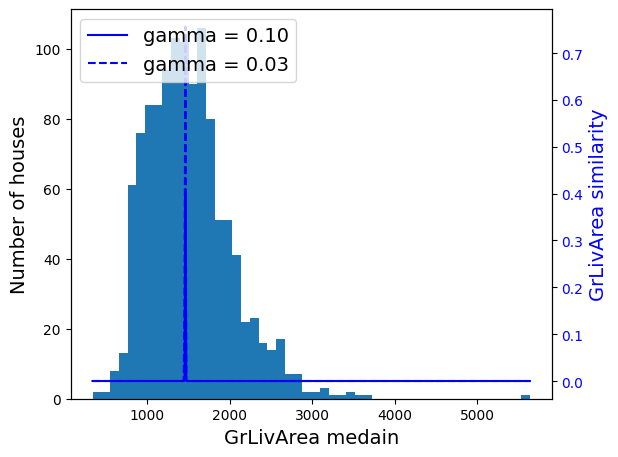

In [89]:
# extra code – this cell generates Figure 2–18

gla = np.linspace(housing["GrLivArea"].min(),
                   housing["GrLivArea"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(gla, [[housing["GrLivArea"].median()]], gamma=gamma1)
rbf2 = rbf_kernel(gla, [[housing["GrLivArea"].median()]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("GrLivArea medain")
ax1.set_ylabel("Number of houses")
ax1.hist(housing["GrLivArea"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(gla, rbf1, color=color, label="gamma = 0.10")
ax2.plot(gla, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("GrLivArea similarity", color=color)

plt.legend(loc="upper left")
save_fig("gla_similarity_plot")
plt.show()

In [90]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["GrLivArea"]], scaled_labels)
some_new_data = housing[["GrLivArea"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [91]:
predictions

array([[239614.52689061],
       [207723.30339414],
       [150567.60414073],
       [229985.03408161],
       [197679.63885143]])

In [92]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["GrLivArea"]], housing_labels)
predictions = model.predict(some_new_data)

In [93]:
predictions

array([239614.52689061, 207723.30339414, 150567.60414073, 229985.03408161,
       197679.63885143])

## Custom Transformers

To create simple transformers:

In [94]:
# from sklearn.preprocessing import FunctionTransformer

# log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
# log_pop = log_transformer.transform(housing[["population"]])

In [95]:
# rbf_transformer = FunctionTransformer(rbf_kernel,
#                                       kw_args=dict(Y=[[35.]], gamma=0.1))
# age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [96]:
# age_simil_35

In [97]:
# sf_coords = 37.7749, -122.41
# sf_transformer = FunctionTransformer(rbf_kernel,
#                                      kw_args=dict(Y=[sf_coords], gamma=0.1))
# sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [98]:
# sf_simil

In [99]:
# ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
# ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

In [100]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.utils.validation import check_array, check_is_fitted

# class StandardScalerClone(BaseEstimator, TransformerMixin):
#     def __init__(self, with_mean=True):  # no *args or **kwargs!
#         self.with_mean = with_mean

#     def fit(self, X, y=None):  # y is required even though we don't use it
#         X = check_array(X)  # checks that X is an array with finite float values
#         self.mean_ = X.mean(axis=0)
#         self.scale_ = X.std(axis=0)
#         self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
#         return self  # always return self!

#     def transform(self, X):
#         check_is_fitted(self)  # looks for learned attributes (with trailing _)
#         X = check_array(X)
#         assert self.n_features_in_ == X.shape[1]
#         if self.with_mean:
#             X = X - self.mean_
#         return X / self.scale_

In [101]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [102]:
# cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
# similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
#                                            sample_weight=housing_labels)

In [103]:
# similarities[:3].round(2)

In [104]:
# # extra code – this cell generates Figure 2–19

# housing_renamed = housing.rename(columns={
#     "latitude": "Latitude", "longitude": "Longitude",
#     "population": "Population",
#     "median_house_value": "Median house value (ᴜsᴅ)"})
# housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

# housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
#                      s=housing_renamed["Population"] / 100, label="Population",
#                      c="Max cluster similarity",
#                      cmap="jet", colorbar=True,
#                      legend=True, sharex=False, figsize=(10, 7))
# plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
#          cluster_simil.kmeans_.cluster_centers_[:, 0],
#          linestyle="", color="black", marker="X", markersize=20,
#          label="Cluster centers")
# plt.legend(loc="upper right")
# save_fig("district_cluster_plot")
# plt.show()

## Transformation Pipelines

Now let's build a pipeline to preprocess the numerical attributes:

In [105]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [106]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [107]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [108]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-0.87,  1.92,  0.45, -0.54,  1.2 ,  1.13,  3.98,  2.64, -0.29,
        -0.26,  2.34,  2.42, -0.8 , -0.13,  1.12,  1.12, -0.25,  0.8 ,
        -0.75, -1.06, -0.2 ,  0.3 ,  0.59,  1.2 ,  1.67,  3.51,  0.77,
        -0.02, -0.37, -0.13, -0.28, -0.07, -0.09, -0.11,  0.14],
       [ 0.08, -0.23,  0.37, -0.54,  1.04,  0.84,  0.24, -0.97, -0.29,
         0.85, -0.26, -0.58,  1.14, -0.13,  0.52, -0.82, -0.25,  0.8 ,
         1.26,  0.16, -0.2 ,  0.3 ,  0.59,  0.99,  0.33,  0.01,  0.42,
         0.75, -0.37, -0.13, -0.28, -0.07, -0.09, -1.59, -1.36]])

In [109]:
# def monkey_patch_get_signature_names_out():
#     """Monkey patch some classes which did not handle get_feature_names_out()
#        correctly in Scikit-Learn 1.0.*."""
#     from inspect import Signature, signature, Parameter
#     import pandas as pd
#     from sklearn.impute import SimpleImputer
#     from sklearn.pipeline import make_pipeline, Pipeline
#     from sklearn.preprocessing import FunctionTransformer, StandardScaler

#     default_get_feature_names_out = StandardScaler.get_feature_names_out

#     if not hasattr(SimpleImputer, "get_feature_names_out"):
#       print("Monkey-patching SimpleImputer.get_feature_names_out()")
#       SimpleImputer.get_feature_names_out = default_get_feature_names_out

#     if not hasattr(FunctionTransformer, "get_feature_names_out"):
#         print("Monkey-patching FunctionTransformer.get_feature_names_out()")
#         orig_init = FunctionTransformer.__init__
#         orig_sig = signature(orig_init)

#         def __init__(*args, feature_names_out=None, **kwargs):
#             orig_sig.bind(*args, **kwargs)
#             orig_init(*args, **kwargs)
#             args[0].feature_names_out = feature_names_out

#         __init__.__signature__ = Signature(
#             list(signature(orig_init).parameters.values()) + [
#                 Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

#         def get_feature_names_out(self, names=None):
#             if callable(self.feature_names_out):
#                 return self.feature_names_out(self, names)
#             assert self.feature_names_out == "one-to-one"
#             return default_get_feature_names_out(self, names)

#         FunctionTransformer.__init__ = __init__
#         FunctionTransformer.get_feature_names_out = get_feature_names_out

# monkey_patch_get_signature_names_out()

In [110]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [111]:
df_housing_num_prepared.head(2)  # extra code

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
825,-0.872834,1.917067,0.447199,-0.537108,1.200435,1.134097,3.981569,2.638052,-0.29181,-0.262819,...,3.513020,0.774256,-0.017718,-0.368108,-0.125354,-0.276894,-0.065186,-0.085456,-0.113153,0.138712
948,0.075841,-0.234300,0.365229,-0.537108,1.035166,0.843673,0.235688,-0.974705,-0.29181,0.847030,...,0.012943,0.419696,0.751003,-0.368108,-0.125354,-0.276894,-0.065186,-0.085456,-1.589825,-1.361429


In [112]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [113]:
num_pipeline[1]

StandardScaler()

In [114]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [115]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [116]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [117]:
from sklearn.compose import ColumnTransformer

# num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
#                "total_bedrooms", "population", "households", "median_income"]
num_attribs = housing.select_dtypes(include='object').columns.values
# cat_attribs = ["ocean_proximity"]
cat_attribs = housing.select_dtypes(exclude='object').columns.values

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [118]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [119]:
housing_prepared = preprocessing.fit_transform(housing)
columns=preprocessing.get_feature_names_out()

283

In [120]:
# extra code – shows that we can get a DataFrame out if we want
# housing_prepared_fr = pd.DataFrame(
#     housing_prepared,
#     columns=preprocessing.get_feature_names_out(),
#     index=housing.index.values)
# housing_prepared_fr.head(2)

ValueError: ignored

In [127]:
from sklearn.preprocessing import FunctionTransformer

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
# cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        # ("f1Feet_per_room", ratio_pipeline(), ["1stFlrSF", "TotRmsAbvGrd"]),
        # ("bedrooms_ratio", ratio_pipeline(), ["BedroomAbvGr", "TotRmsAbvGrd"]),
        # ("grFeet_per_car", ratio_pipeline(), ["GarageArea", "GarageCars"]),
        # ("log", log_pipeline, ["1stFlrSF", "TotRmsAbvGrd", "BedroomAbvGr", "TotRmsAbvGrd"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

In [128]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(1168, 283)

In [129]:
len(preprocessing.get_feature_names_out())

283

In [130]:
housing_prepared

<1168x283 sparse matrix of type '<class 'numpy.float64'>'
	with 91104 stored elements in Compressed Sparse Row format>

# Select and Train a Model

## Training and Evaluating on the Training Set

In [131]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f20fc35ac80>)])),
                ('linearregression', LinearRegression())])

Let's try the full preprocessing pipeline on a few training instances:

In [132]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([385000., 200900., 154200., 218700., 211700.])

Compare against the actual values:

In [133]:
housing_labels.iloc[:5].values

array([385000, 192500, 153337, 220000, 193500])

In [134]:
# extra code – computes the error ratios discussed in the book
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

0.0%, 4.4%, 0.6%, -0.6%, 9.4%


In [135]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

18209.453531733583

In [136]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f20fc35ac80>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [137]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [138]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [139]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     39466.133432
std       5974.485126
min      31896.596824
25%      35746.001569
50%      39528.459895
75%      41504.317325
max      50700.467250
dtype: float64

In [140]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     34369.732263
std      21375.707201
min      20728.485021
25%      21639.729759
50%      24405.347254
75%      32492.832279
max      76876.651102
dtype: float64

**Warning:** the following cell may take a few minutes to run:

In [141]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [142]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     27969.178400
std       5683.659252
min      19869.064398
25%      24108.206791
50%      26177.238974
75%      31857.522723
max      36388.349076
dtype: float64

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [143]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

10408.718475476582

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

# Fine-Tune Your Model

## Grid Search

**Warning:** the following cell may take a few minutes to run:

In [174]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    # {
        # "preprocessing__geo__n_clusters": [5, 8, 10],
    #  "random_forest__max_features": [4, 6, 8]},
    {
        # "preprocessing__geo__n_clusters": [10, 15],
     "random_forest__max_features": [35, 40, 45]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)
grid_search.best_params_

{'random_forest__max_features': 40}

You can get the full list of hyperparameters available for tuning by looking at `full_pipeline.get_params().keys()`:

In [147]:
# extra code – shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__simpleimputer__verbose', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose'

The best hyperparameter combination found:

In [171]:
grid_search.best_params_

{'random_forest__max_features': 40}

In [149]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f20fb324760>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=10, random_state=42))])

Let's look at the score of each hyperparameter combination tested during the grid search:

In [175]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[[
    # "param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = [
    # "n_clusters",
     "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
1,40,26800,29688,30456,28982
0,35,26854,29709,30985,29183
2,45,27130,28968,31522,29207


## Randomized Search

In [176]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (`n_iter` × `cv`) random combinations of hyperparameters:

**Warning:** the following cell may take a few minutes to run:

In [177]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    # 'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=78)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f20fc35ac80>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f20fbd0a0e0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [178]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[[
    # "param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = [
    # "n_clusters",
     "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
2,73,27640,28877,30373,28963
3,62,27400,29018,30709,29042
5,76,27357,29202,31396,29318
6,76,27357,29202,31396,29318
7,25,26528,30120,31670,29439


**Bonus section: how to choose the sampling distribution for a hyperparameter**

* `scipy.stats.randint(a, b+1)`: for hyperparameters with _discrete_ values that range from a to b, and all values in that range seem equally likely.
* `scipy.stats.uniform(a, b)`: this is very similar, but for _continuous_ hyperparameters.
* `scipy.stats.geom(1 / scale)`: for discrete values, when you want to sample roughly in a given scale. E.g., with scale=1000 most samples will be in this ballpark, but ~10% of all samples will be <100 and ~10% will be >2300.
* `scipy.stats.expon(scale)`: this is the continuous equivalent of `geom`. Just set `scale` to the most likely value.
* `scipy.stats.loguniform(a, b)`: when you have almost no idea what the optimal hyperparameter value's scale is. If you set a=0.01 and b=100, then you're just as likely to sample a value between 0.01 and 0.1 as a value between 10 and 100.


Here are plots of the probability mass functions (for discrete variables), and probability density functions (for continuous variables) for `randint()`, `uniform()`, `geom()` and `expon()`:

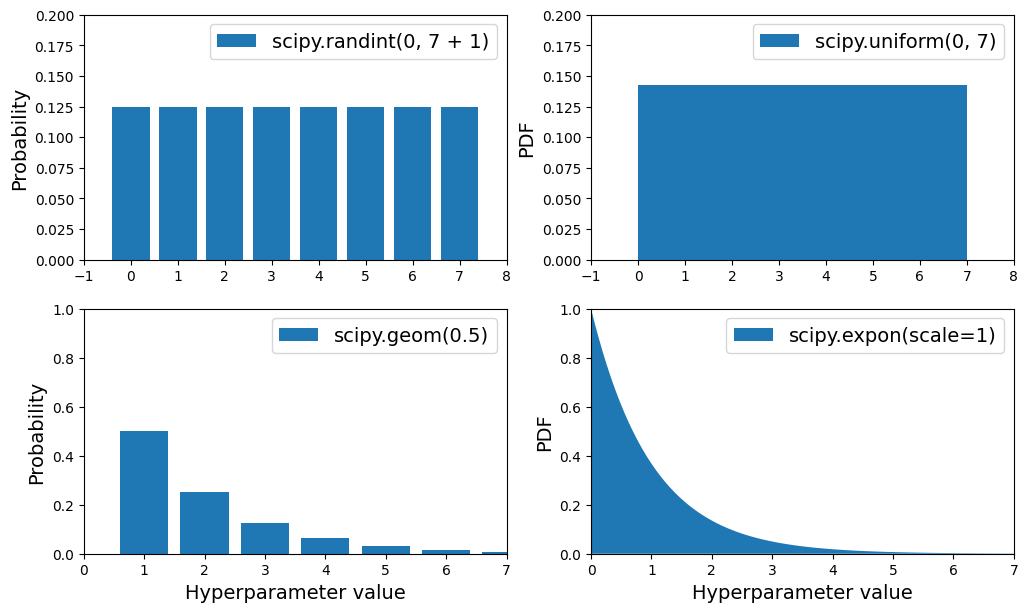

In [ ]:
# extra code – plots a few distributions you can use in randomized search

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

Here are the PDF for `expon()` and `loguniform()` (left column), as well as the PDF of log(X) (right column). The right column shows the distribution of hyperparameter _scales_. You can see that `expon()` favors hyperparameters with roughly the desired scale, with a longer tail towards the smaller scales. But `loguniform()` does not favor any scale, they are all equally likely:

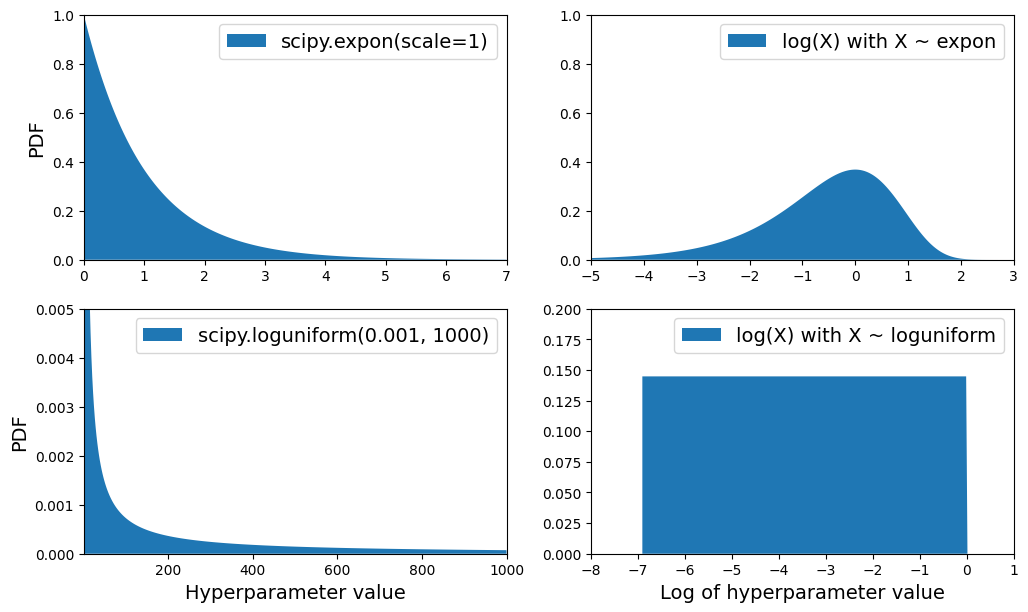

In [ ]:
# extra code – shows the difference between expon and loguniform

from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

## Analyze the Best Models and Their Errors

In [179]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.08,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.05, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.

In [180]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.1597663249558035, 'remainder__GrLivArea'),
 (0.11815219854904375, 'remainder__GarageCars'),
 (0.08332638261796439, 'cat__ExterQual_TA'),
 (0.0740463183086827, 'remainder__GarageArea'),
 (0.05686741821113179, 'remainder__YearBuilt'),
 (0.05000376291544737, 'remainder__TotalBsmtSF'),
 (0.049834733254125387, 'remainder__1stFlrSF'),
 (0.04721606548023632, 'cat__BsmtQual_Ex'),
 (0.022888039072721272, 'remainder__LotArea'),
 (0.0224062870888362, 'remainder__2ndFlrSF'),
 (0.021827908550933875, 'remainder__BsmtFinSF1'),
 (0.018429491861408027, 'remainder__GarageYrBlt'),
 (0.017982213538822067, 'cat__KitchenQual_TA'),
 (0.015885365892778867, 'remainder__FullBath'),
 (0.014370460572940518, 'cat__GarageFinish_Unf'),
 (0.012892284469477648, 'remainder__MasVnrArea'),
 (0.012626383461812413, 'remainder__Fireplaces'),
 (0.010889580126946012, 'remainder__YearRemodAdd'),
 (0.010832859292935188, 'cat__KitchenQual_Ex'),
 (0.01027026994208453, 'cat__ExterQual_Gd'),
 (0.009612232861626959, 'remainder__

## Evaluate Your System on the Test Set

In [181]:
X_test = strat_test_set.drop("SalePrice", axis=1)
y_test = strat_test_set["SalePrice"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

39674.68364580018


In [187]:
X_test = pd.read_csv(Path('test.csv'))
real_pred = final_model.predict(X_test.drop('Id', axis=1))
real_pred = pd.DataFrame(real_pred, index = X_test['Id'])
real_pred.to_csv('real_pred.csv')
print(real_pred)

              0
Id             
1461  127418.50
1462  152276.25
1463  187683.85
1464  191042.82
1465  198536.34
...         ...
2915   89541.00
2916   87633.00
2917  155854.87
2918  118046.25
2919  218890.05

[1459 rows x 1 columns]


We can compute a 95% confidence interval for the test RMSE:

In [159]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([26780.96307506, 53951.96242287])

We could compute the interval manually like this:

In [161]:
# extra code – shows how to compute a confidence interval for the RMSE
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(26780.96307506027, 53951.96242286995)

Alternatively, we could use a z-score rather than a t-score. Since the test set is not too small, it won't make a big difference:

In [162]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(26865.993047064858, 53909.671211217516)

## Model persistence using joblib

Save the final model:

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [ ]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [ ]:
predictions

array([442737.15, 457566.06, 105965.  ,  98462.  , 332992.01])

You could use pickle instead, but joblib is more efficient.

# Exercise solutions

## 1.

Exercise: _Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the SVM notebook if you're interested). How does the best `SVR` predictor perform?_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd5a061c10>)])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                     10000.0, 30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

The best model achieves the following score (evaluated using 3-fold cross validation):

In [ ]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

69814.138885716

That's much worse than the `RandomForestRegressor` (but to be fair, we trained the model on much less data). Let's check the best hyperparameters found:

In [ ]:
grid_search.best_params_

{'svr__C': 10000.0, 'svr__kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Exercise: _Try replacing the `GridSearchCV` with a `RandomizedSearchCV`._

**Warning:** the following cell will take several minutes to run. You can specify `verbose=2` when creating the `RandomizedSearchCV` if you want to see the training details.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, loguniform

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `loguniform()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd5a061c10>)])),
                                             ('svr', SVR())]),
                   n_iter=50,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fbd5cf919d0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fbd59ffaa60>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

The best model achieves the following score (evaluated using 3-fold cross validation):

In [ ]:
svr_rnd_search_rmse = -rnd_search.best_score_
svr_rnd_search_rmse

55853.88100146036

Now that's really much better, but still far from the `RandomForestRegressor`'s performance. Let's check the best hyperparameters found:

In [ ]:
rnd_search.best_params_

{'svr__C': 157055.10989448498,
 'svr__gamma': 0.26497040005002437,
 'svr__kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Note that we used the `expon()` distribution for `gamma`, with a scale of 1, so `RandomSearch` mostly searched for values roughly of that scale: about 80% of the samples were between 0.1 and 2.3 (roughly 10% were smaller and 10% were larger):

In [ ]:
np.random.seed(42)

s = expon(scale=1).rvs(100_000)  # get 100,000 samples
((s > 0.105) & (s < 2.29)).sum() / 100_000

0.80066

We used the `loguniform()` distribution for `C`, meaning we did not have a clue what the optimal scale of `C` was before running the random search. It explored the range from 20 to 200 just as much as the range from 2,000 to 20,000 or from 20,000 to 200,000.

## 3.

Exercise: _Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes._

Let's create a new pipeline that runs the previously defined preparation pipeline, and adds a `SelectFromModel` transformer based on a `RandomForestRegressor` before the final regressor:

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


count        3.000000
mean     56211.362089
std       1922.002802
min      54150.008629
25%      55339.929912
50%      56529.851196
75%      57242.038818
max      57954.226441
dtype: float64

Oh well, feature selection does not seem to help. But maybe that's just because the threshold we used was not optimal. Perhaps try tuning it using random search or grid search?

## 4.

Exercise: _Try creating a custom transformer that trains a k-Nearest Neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model's predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts._

Rather than restrict ourselves to k-Nearest Neighbors regressors, let's create a transformer that accepts any regressor. For this, we can extend the `MetaEstimatorMixin` and have a required `estimator` argument in the constructor. The `fit()` method must work on a clone of this estimator, and it must also save `feature_names_in_`. The `MetaEstimatorMixin` will ensure that `estimator` is listed as a required parameters, and it will update `get_params()` and `set_params()` to make the estimator's hyperparameters available for tuning. Lastly, we create a `get_feature_names_out()` method: the output column name is the ...

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone

class FeatureFromRegressor(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self  # always return self!
    
    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

Let's ensure it complies to Scikit-Learn's API:

In [ ]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

Good! Now let's test it:

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = housing[["latitude", "longitude"]]
knn_transformer.fit_transform(geo_features, housing_labels)

array([[412500.33333333],
       [435250.        ],
       [105100.        ],
       ...,
       [148800.        ],
       [500001.        ],
       [234333.33333333]])

And what does its output feature name look like?

In [ ]:
knn_transformer.get_feature_names_out()

['kneighborsregressor_prediction_0']

Okay, now let's include this transformer in our preprocessing pipeline:

In [ ]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns)
                for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [ ]:
new_geo_pipeline = Pipeline([
    ('preprocessing', new_geo_preprocessing),
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
new_pipe_rmses = -cross_val_score(new_geo_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(new_pipe_rmses).describe()

count         3.000000
mean     104866.322819
std        2966.688335
min      101535.315061
25%      103687.330297
50%      105839.345534
75%      106531.826698
max      107224.307862
dtype: float64

Yikes, that's terrible! Apparently the cluster similarity features were much better. But perhaps we should tune the `KNeighborsRegressor`'s hyperparameters? That's what the next exercise is about.

## 5.

Exercise: _Automatically explore some preparation options using `RandomSearchCV`._

In [ ]:
param_distribs = {
    "preprocessing__geo__estimator__n_neighbors": range(1, 30),
    "preprocessing__geo__estimator__weights": ["distance", "uniform"],
    "svr__C": loguniform(20, 200_000),
    "svr__gamma": expon(scale=1.0),
}

new_geo_rnd_search = RandomizedSearchCV(new_geo_pipeline,
                                        param_distributions=param_distribs,
                                        n_iter=50,
                                        cv=3,
                                        scoring='neg_root_mean_squared_error',
                                        random_state=42)
new_geo_rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x7fbd580950d0>,
                                                                                                                    func=<function column_ratio at 0x7fbd58095040>)),
                                                                                               ('standardscaler',
                                                                                                StandardSc...
                   param_distributions={'preprocessing__geo__estimator__n_neighbors': range(1, 30),
                                        'preprocessing__geo__estimator__weights': ['distance',
                                                                                   'uniform'],
                                        'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fbd549c0b50>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fbd549e5ca0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
new_geo_rnd_search_rmse = -new_geo_rnd_search.best_score_
new_geo_rnd_search_rmse

106768.04614723712

Oh well... at least we tried! It looks like the cluster similarity features are definitely better than the KNN feature. But perhaps you could try having both? And maybe training on the full training set would help as well.

## 6.

Exercise: _Try to implement the `StandardScalerClone` class again from scratch, then add support for the `inverse_transform()` method: executing `scaler.inverse_transform(scaler.fit_transform(X))` should return an array very close to `X`. Then add support for feature names: set `feature_names_in_` in the `fit()` method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the `get_feature_names_out()` method: it should have one optional `input_features=None` argument. If passed, the method should check that its length matches `n_features_in_`, and it should match `feature_names_in_` if it is defined, then `input_features` should be returned. If `input_features` is `None`, then the method should return `feature_names_in_` if it is defined or `np.array(["x0", "x1", ...])` with length `n_features_in_` otherwise._

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X_orig = X
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        if hasattr(X_orig, "columns"):
            self.feature_names_in_ = np.array(X_orig.columns, dtype=object)
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_
    
    def inverse_transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        X = X * self.scale_
        return X + self.mean_ if self.with_mean else X
    
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])
        else:
            if len(input_features) != self.n_features_in_:
                raise ValueError("Invalid number of features")
            if hasattr(self, "feature_names_in_") and not np.all(
                self.feature_names_in_ == input_features
            ):
                raise ValueError("input_features ≠ feature_names_in_")
            return input_features

Let's test our custom transformer:

In [ ]:
from sklearn.utils.estimator_checks import check_estimator
 
check_estimator(StandardScalerClone())

No errors, that's a great start, we respect the Scikit-Learn API.

Now let's ensure the transformation works as expected:

In [ ]:
np.random.seed(42)
X = np.random.rand(1000, 3)

scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(X)

assert np.allclose(X_scaled, (X - X.mean(axis=0)) / X.std(axis=0))

How about setting `with_mean=False`?

In [ ]:
scaler = StandardScalerClone(with_mean=False)
X_scaled_uncentered = scaler.fit_transform(X)

assert np.allclose(X_scaled_uncentered, X / X.std(axis=0))

And does the inverse work?

In [ ]:
scaler = StandardScalerClone()
X_back = scaler.inverse_transform(scaler.fit_transform(X))

assert np.allclose(X, X_back)

How about the feature names out?

In [ ]:
assert np.all(scaler.get_feature_names_out() == ["x0", "x1", "x2"])
assert np.all(scaler.get_feature_names_out(["a", "b", "c"]) == ["a", "b", "c"])

And if we fit a DataFrame, are the feature in and out ok?

In [ ]:
df = pd.DataFrame({"a": np.random.rand(100), "b": np.random.rand(100)})
scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(df)

assert np.all(scaler.feature_names_in_ == ["a", "b"])
assert np.all(scaler.get_feature_names_out() == ["a", "b"])

All good! That's all for today! 😀

Congratulations! You already know quite a lot about Machine Learning. :)